1. The goal is to build a ML model that will predict if a client will
subscribe to the insurance.
2. The model must be
analysed to find the important factors that contribute towards
the price.

Features in the data set

● age (numeric)

● job : type of job

● marital : marital status

● educational_qual : education status

● call_type : contact communication type

● day: last contact day of the month (numeric)

● mon: last contact month of year

● dur: last contact duration, in seconds (numeric)

● num_calls: number of contacts performed during this
campaign and for this client

● prev_outcome: outcome of the previous marketing
campaign (categorical:
"unknown","other","failure","success")

Output variable (desired target):
● y - has the client subscribed to the insurance?

In [96]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [97]:
df = pd.DataFrame(pd.read_excel("/content/Customer Conversion Prediction.xlsx"))
  
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
45207,71.0,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
45208,72.0,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
45209,57.0,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no


In [98]:
df.shape

(45211, 11)

In [99]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [100]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


In [101]:
print(f'➤ The DataFrame(df) contains {df.shape[0]} rows and {df.shape[1]} columns.')

➤ The DataFrame(df) contains 45211 rows and 11 columns.


So as per the above data, day column doesn't contribute towards the price and to determine whether customer subscribed to the insurance. 

Hence dropping of the column

In [102]:
df.drop(columns = ['day'],inplace=True)

In [103]:
print(f'➤ Now the shape of the Dataframe is {df.shape[0]} rows and {df.shape[1]} columns.')

➤ Now the shape of the Dataframe is 45211 rows and 10 columns.


Predicting the missing values

In [104]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

As per the data there are no missing values

In [105]:
df.dtypes

age               float64
job                object
marital            object
education_qual     object
call_type          object
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

In [106]:
df['age'] = df['age'].astype(int)
df['dur'] = df['dur'].astype(int)
df['num_calls'] = df['num_calls'].astype(int)


In [107]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [108]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64
0,7,3


Integer data columns

In [109]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['age', 'dur', 'num_calls']

In [110]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

Exploring the object type data columns

In [111]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "job" is divided into "12" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "4" categories.
Column "call_type" is divided into "3" categories.
Column "mon" is divided into "12" categories.
Column "prev_outcome" is divided into "4" categories.
Column "y" is divided into "2" categories.


Analysing the columns

In [112]:
# for column "area"
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [113]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [114]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [115]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [116]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [117]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [118]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [119]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "job" is divided into "12" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "4" categories.
Column "call_type" is divided into "3" categories.
Column "mon" is divided into "12" categories.
Column "prev_outcome" is divided into "4" categories.
Column "y" is divided into "2" categories.


Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

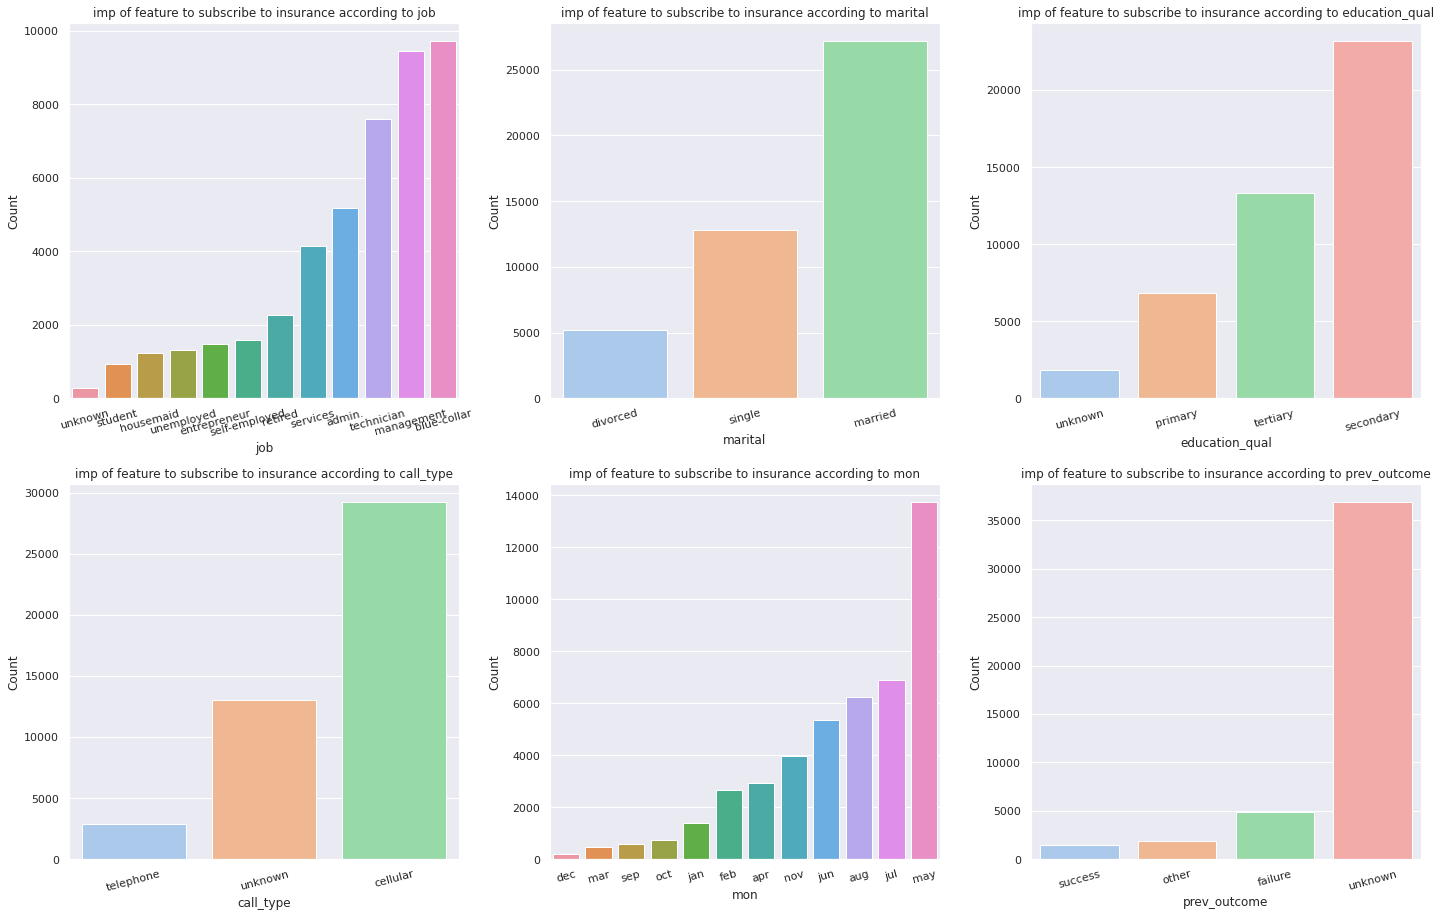

In [120]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('imp of feature to subscribe to insurance according to job')

plt.subplot(432)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('imp of feature to subscribe to insurance according to marital')

plt.subplot(433)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('imp of feature to subscribe to insurance according to education_qual')

plt.subplot(434)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('imp of feature to subscribe to insurance according to call_type')

plt.subplot(435)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('imp of feature to subscribe to insurance according to mon')

plt.subplot(436)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('imp of feature to subscribe to insurance according to prev_outcome')


plt.tight_layout()

Interpretations :
 1.) According to the column "job" the highest number of people subscribed to the insurance are blue collar employees.

 2.) According to the column "marital", married people are more subscribed to the insurance.

 3.) According to the column "education_qual", secondary qualified people subscribed to the insurance more.

 4.) According to the column "call_type", most of the calls were done through cellular.

 5.) According to the column "mon", more people subscribed to the insurance especially in the month of may.
 
 6.) According to the column "prev_outcome", unknown is having more data and we are unable to predict using the prev_outcome.

    Plotting barplots for Categorical Columns vs Mean Sales Price.

encoding

In [121]:
df['y'] = df['y'].map({'no':0,'yes':1})


In [122]:
job_order = df.groupby('job')['y'].mean().reset_index().sort_values('y')['job']
marital_order = df.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital']
education_qual_order = df.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual']
call_type_order = df.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type']
mon_order = df.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon']
prev_outcome_order = df.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

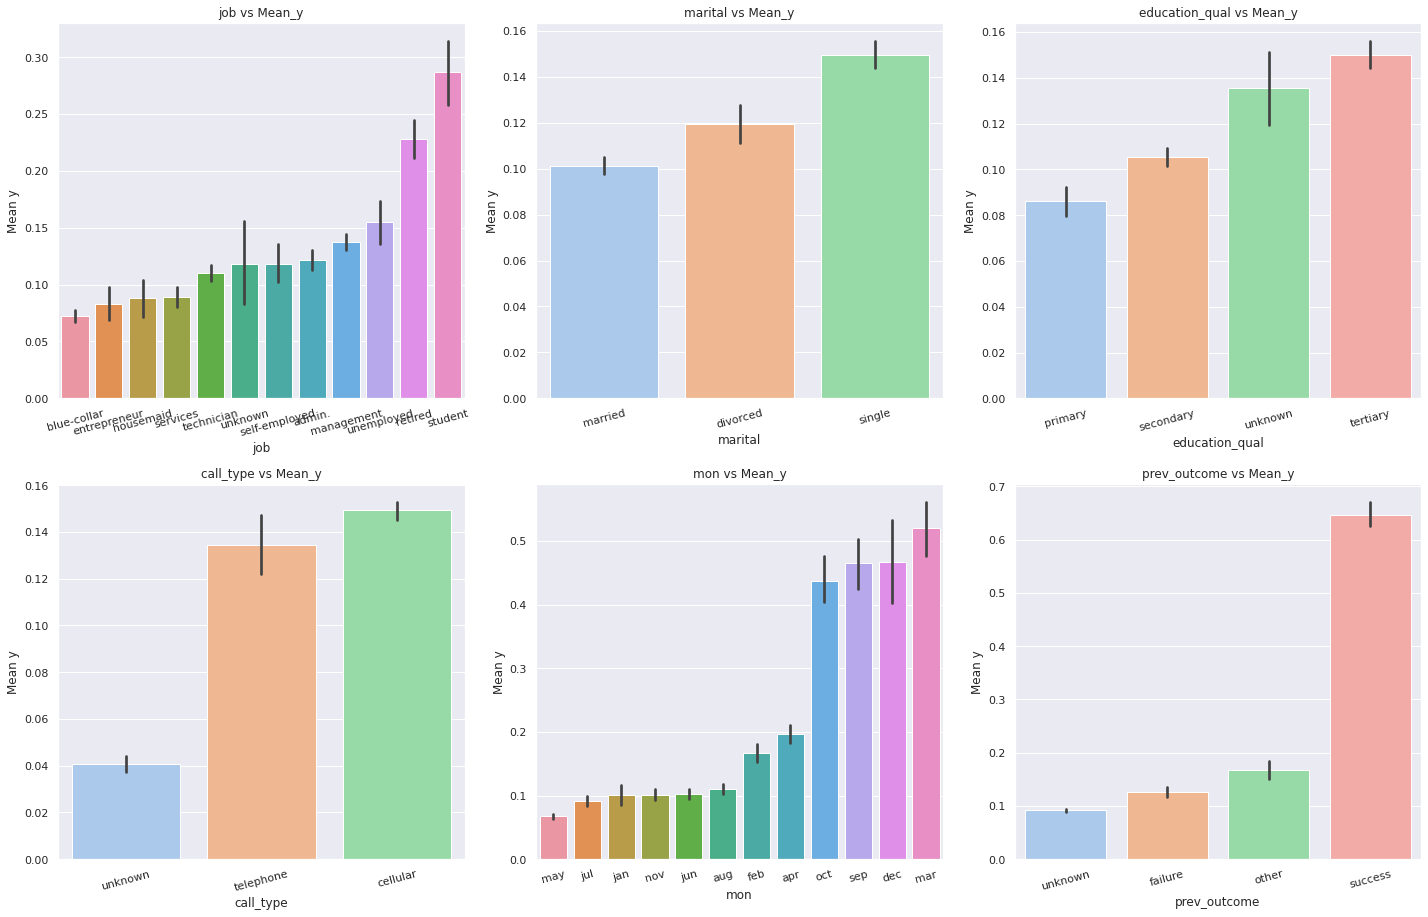

In [123]:
#for categorical columns
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['job'],df['y'],order=job_order)
plt.xticks(rotation=15)
plt.xlabel('job')
plt.ylabel('Mean y')
plt.title('job vs Mean_y')

plt.subplot(432)
sns.barplot(df['marital'],df['y'],order=marital_order)
plt.xticks(rotation=15)
plt.xlabel('marital')
plt.ylabel('Mean y')
plt.title('marital vs Mean_y')

plt.subplot(433)
sns.barplot(df['education_qual'],df['y'],order=education_qual_order)
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('Mean y')
plt.title('education_qual vs Mean_y')

plt.subplot(434)
sns.barplot(df['call_type'],df['y'],order=call_type_order)
plt.xticks(rotation=15)
plt.xlabel('call_type')
plt.ylabel('Mean y')
plt.title('call_type vs Mean_y')

plt.subplot(435)
sns.barplot(df['mon'],df['y'],order=mon_order)
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('Mean y')
plt.title('mon vs Mean_y')

plt.subplot(436)
sns.barplot(df['prev_outcome'],df['y'],order=prev_outcome_order)
plt.xticks(rotation=15)
plt.xlabel('prev_outcome')
plt.ylabel('Mean y')
plt.title('prev_outcome vs Mean_y')


plt.tight_layout()

    Plotting line plots for integer column vs y column.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'num_calls vs y')

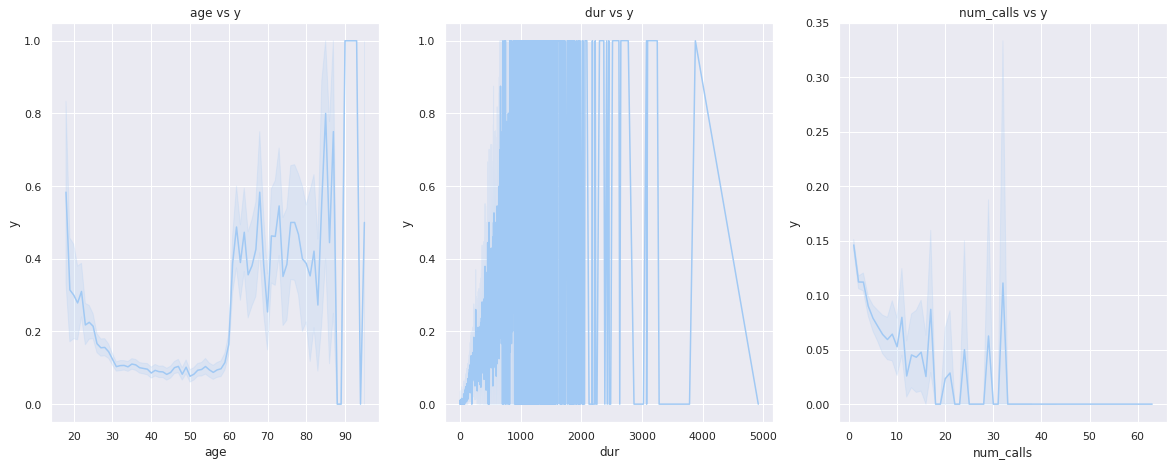

In [124]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.lineplot(df['age'],df['y'])
plt.title('age vs y')
plt.subplot(332)
sns.lineplot(df['dur'],df['y'])
plt.title('dur vs y')
plt.subplot(333)
sns.lineplot(df['num_calls'],df['y'])
plt.title('num_calls vs y')


For column 'dist_mainroad' the distribution is uniform, no such linear relationship is discovered here.


## Encoding Categorical Variables


In [131]:
from sklearn import preprocessing


In [226]:

le = preprocessing.LabelEncoder()
cols = ['job', 'marital', 'education_qual', 'call_type','mon', 'prev_outcome','y']
df[cols] = df[cols].apply(le.fit_transform)
 
# Print head
#
df.head()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,y,OUTPUT_LABEL
0,23,8,2,1,0,3,742,2,0,1,0
1,34,4,2,2,0,3,10,6,3,0,0
2,55,9,1,1,0,1,94,6,3,0,0
3,58,9,1,2,1,5,517,5,3,0,0
4,47,1,1,0,2,8,77,1,3,0,0


Splitting the data into input data and output data

In [229]:

def split(dataframe):
  X = dataframe.drop('y',axis=1)
  y = dataframe['y']
  return X,y

In [230]:
X, y = split(df)

In [231]:
X

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,OUTPUT_LABEL
0,23,8,2,1,0,3,742,2,0,0
1,34,4,2,2,0,3,10,6,3,0
2,55,9,1,1,0,1,94,6,3,0
3,58,9,1,2,1,5,517,5,3,0
4,47,1,1,0,2,8,77,1,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,38,1,1,0,2,8,62,4,3,0
45207,30,1,1,0,1,5,80,2,3,0
45208,32,9,2,2,0,9,164,2,3,0
45209,35,4,0,2,0,9,89,1,3,0


In [232]:
y

0        1
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [234]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 10) (9043, 10) (36168,) (9043,)


<AxesSubplot:>

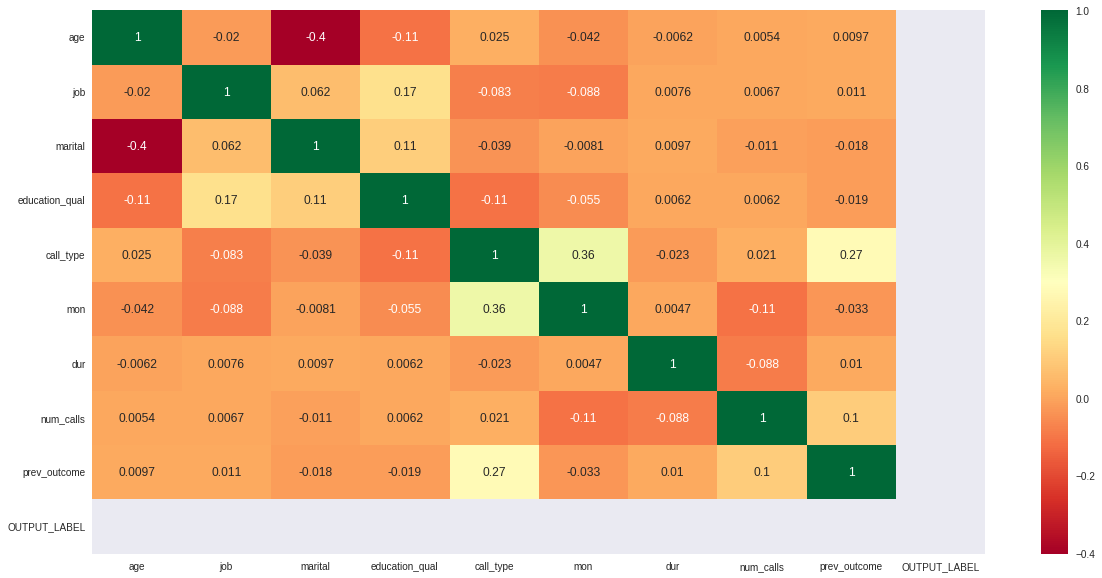

In [235]:
# checking for correlations in the input data
plt.figure(figsize=(20,10))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

In [236]:
# creating a function to detect the presence of features in our training set where the features are highly correlated
def correlation(dataset,threshold):
  correlated_features = set()
  cor_matrix = dataset.corr()
  for i in range(len(cor_matrix.columns)):
    for j in range(i):
      if abs(cor_matrix.iloc[i,j]) > threshold:
        col_name = cor_matrix.columns[i]
        correlated_features.add(col_name)
  return correlated_features

In [237]:
corr_cols = correlation(X_train,0.8)

In [238]:
print(corr_cols)

set()


There are no correlated columns.

Building Machine Learning Model

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

Linear regression

In [246]:
from sklearn.linear_model import LinearRegression #import
linear_model=LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic 
linear_model.predict(X_test)     #predict

array([0.06158807, 0.11588123, 0.09328501, ..., 0.04521058, 0.08675716,
       0.13256029])

In [247]:
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.1879431197735624

K Nearest Neighbor Regression

Choosing the best K(neighbor) Value

In [248]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  0.9992032124759901 cross_val_score :  -0.4659255767102929
K value :  2  train score :  0.6805546018323777 cross_val_score :  -0.11972311853471225
K value :  3  train score :  0.5704429926115697 cross_val_score :  -0.010351814478812638
K value :  4  train score :  0.5136774147725613 cross_val_score :  0.0457412765925256
K value :  5  train score :  0.4754694610274781 cross_val_score :  0.07775206881676157
K value :  6  train score :  0.4535365564499 cross_val_score :  0.10121270917968958
K value :  7  train score :  0.4318200311781616 cross_val_score :  0.11946763986921867
K value :  8  train score :  0.417498520728537 cross_val_score :  0.1303555729246933
K value :  9  train score :  0.4086623356275252 cross_val_score :  0.1397944126947824
K value :  10  train score :  0.3985821209189394 cross_val_score :  0.14927924095567058
K value :  11  train score :  0.3914496872752965 cross_val_score :  0.15560117050317634
K value :  12  train score :  0.3833915881035

In [249]:
cross_val_knn_regressor=max(cross_val_knn)

In [250]:
print("The best K-Value is 11 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 11 and Cross_val_score is 0.27453577273459173


Implementing K Nearest Neighbor Regression

In [251]:
knn_regressor=KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [252]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train,y_train,cv=15).mean()
cross_val_knn_regressor

0.15391593815204724

Decision Tree Regression

In [253]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,15)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())

Depth :  1  train Score  :  0.1250281239339962 cross_val_score :  0.12114345019517182
Depth :  2  train Score  :  0.16995123869811812 cross_val_score :  0.1652524715435553
Depth :  3  train Score  :  0.20567623324495 cross_val_score :  0.19677974239351198
Depth :  4  train Score  :  0.23111020635071144 cross_val_score :  0.21953948454010117
Depth :  5  train Score  :  0.2917908162586651 cross_val_score :  0.2650228742407801
Depth :  6  train Score  :  0.32199874079310775 cross_val_score :  0.2855700934400335
Depth :  7  train Score  :  0.3452520486473937 cross_val_score :  0.28727341896575337
Depth :  8  train Score  :  0.3782478330341722 cross_val_score :  0.28537187767021044
Depth :  9  train Score  :  0.4143841756884694 cross_val_score :  0.26215065818912486
Depth :  10  train Score  :  0.4638085082491368 cross_val_score :  0.23742008978317694
Depth :  11  train Score  :  0.514468653786641 cross_val_score :  0.20623319850203933
Depth :  12  train Score  :  0.5665865484471508 cross_v

In [254]:
cross_val_dt_regressor=max(cross_val_dt)

In [255]:
print("The best depth is 11 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 11 and Cross_val_score is: 0.28727341896575337


Implementing Decision Tree Regression

In [256]:
dt_regressor=DecisionTreeRegressor(max_depth=3, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [257]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=15).mean()
cross_val_dt_regressor

0.19677974239351198

In [259]:
ftImp = list(zip(dt_regressor.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
6,0.737903,dur
5,0.135099,mon
0,0.090172,age
4,0.036825,call_type
1,0.000000,job
2,0.000000,marital
3,0.000000,education_qual
7,0.000000,num_calls
8,0.000000,prev_outcome
9,0.000000,y


AUC-ROC Curve 

In [294]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [295]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [296]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8192823084612132 0.73048203327199


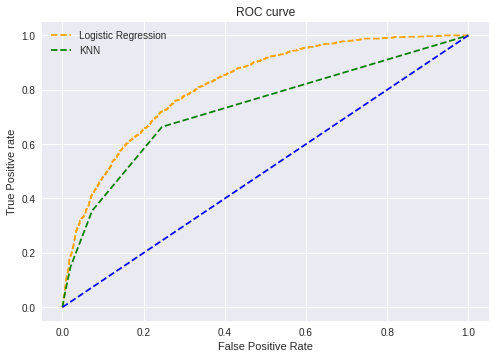

In [297]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

It is evident from the plot that the AUC for the Logistic Regression ROC curve is higher than that for the KNN ROC curve. Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset.



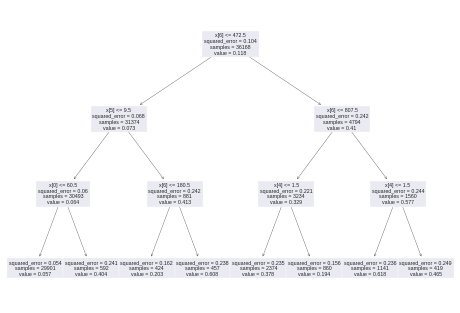

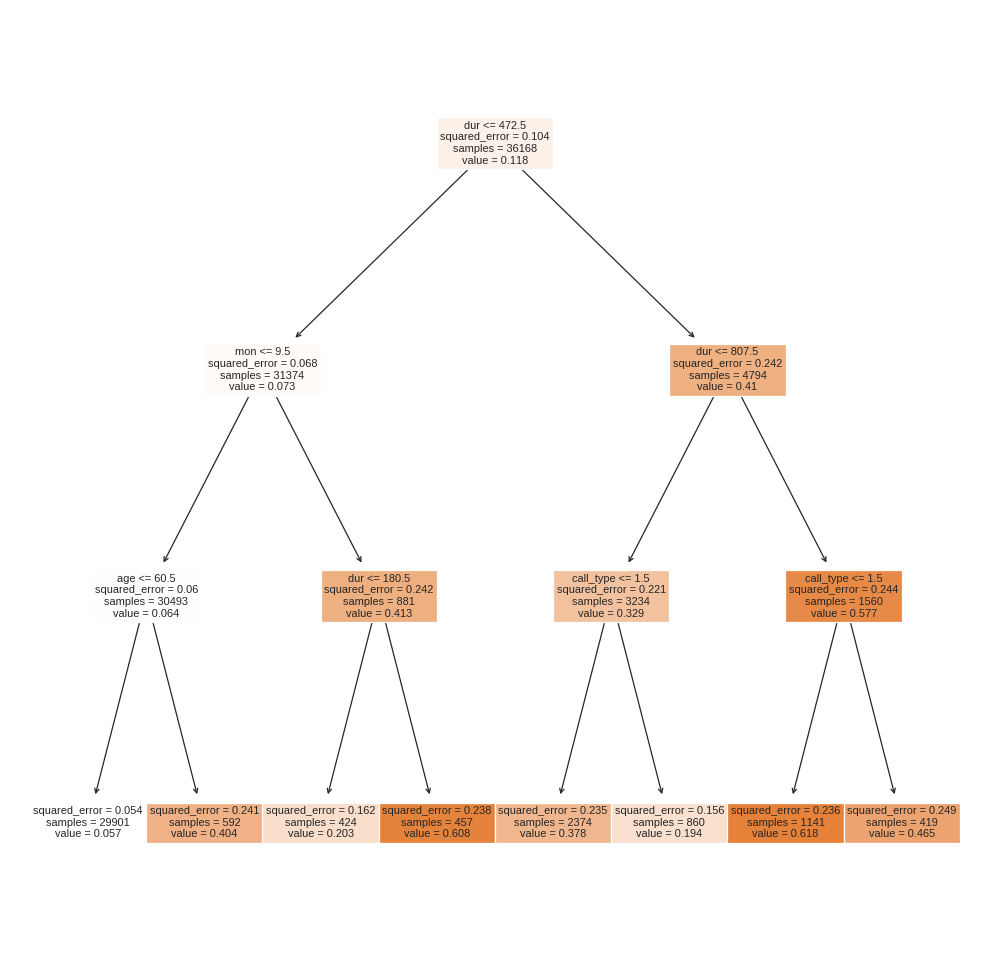

In [261]:
from sklearn import tree
tree.plot_tree(dt_regressor) 

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_regressor,
               feature_names = df.columns[:-1],
               filled = True);
fig.savefig('imagename.png')

Random Forest Regression

Choosing the best depth value

In [262]:
max_depth=np.arange(1,20)
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  1 cross_val_score :  0.1334570780299861
Depth :  2 cross_val_score :  0.17799462165459967
Depth :  3 cross_val_score :  0.22433860025168906
Depth :  4 cross_val_score :  0.25699169487122164
Depth :  5 cross_val_score :  0.2914451891903524
Depth :  6 cross_val_score :  0.30738770072681026
Depth :  7 cross_val_score :  0.31803369325570596
Depth :  8 cross_val_score :  0.32486945930225225
Depth :  9 cross_val_score :  0.3285271357051728
Depth :  10 cross_val_score :  0.3333101240989249
Depth :  11 cross_val_score :  0.33793345524221596
Depth :  12 cross_val_score :  0.3368063987551243
Depth :  13 cross_val_score :  0.33394841427445177
Depth :  14 cross_val_score :  0.33076993965858625
Depth :  15 cross_val_score :  0.3254517132039967
Depth :  16 cross_val_score :  0.32117229401878916
Depth :  17 cross_val_score :  0.31690680718787173
Depth :  18 cross_val_score :  0.3114039111672609
Depth :  19 cross_val_score :  0.30931408015856215


In [263]:
cross_val_rf_regressor=max(cross_val_rf)

In [264]:
print("The best depth is 17 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 17 and Cross_val_score is: 0.33793345524221596


# implementing Random Forest Regression

In [265]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)


RandomForestRegressor(max_depth=18, random_state=0)

In [266]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.3114039111672609

Gradient Boosting Regression

Choosing the best Learning Rate

In [267]:
cross_val_gb=[]
for lr in [0.01,0.05,0.1,0.2,0.3,0.35,0.4,0.5,0.8,1]:
  gb_regressor= GradientBoostingRegressor(learning_rate=lr)
  gb_regressor.fit(X_train, y_train)
  print("Learning rate : ", lr, "cross_val_score : ", cross_val_score(gb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_gb.append(cross_val_score(gb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score :  0.21198745528300716
Learning rate :  0.05 cross_val_score :  0.3258970629361182
Learning rate :  0.1 cross_val_score :  0.3439859409473415
Learning rate :  0.2 cross_val_score :  0.3477501076628256
Learning rate :  0.3 cross_val_score :  0.3461789503071593
Learning rate :  0.35 cross_val_score :  0.3420092093381594
Learning rate :  0.4 cross_val_score :  0.34140437756613584
Learning rate :  0.5 cross_val_score :  0.33353200704410674
Learning rate :  0.8 cross_val_score :  0.30434835172285735
Learning rate :  1 cross_val_score :  0.2841536966674969


In [273]:
cross_val_xgb_regressor=max(cross_val_xgb, default=0)


In [274]:
print("The best Learning rate is 0.09 and Cross_val_score is:",cross_val_xgb_regressor)


The best Learning rate is 0.09 and Cross_val_score is: 0


Implementing Extreme Gradient Boosting Regression

In [275]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate =0.12,n_estimators=1000) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.12, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [276]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.3025841760696789

 Cross-Validation Score for Machine-Learning Models

In [278]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.1879431197735624
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.15391593815204724
Cross Validation Score for Decision Tree Regression Model:  0.19677974239351198
Cross Validation Score for Random Forest Regression Model:  0.3114039111672609
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.3025841760696789


Suggestion to Sellers and buyers-Solving problem statements

In [282]:
rf_regressor.feature_importances_

array([0.16576942, 0.07088473, 0.03081079, 0.03855044, 0.02862324,
       0.13195846, 0.3924256 , 0.05601541, 0.08496191, 0.        ])

In [283]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'mon', 'dur',
       'num_calls', 'prev_outcome', 'y', 'OUTPUT_LABEL'],
      dtype='object')

In [284]:
xgb_regressor.feature_importances_

array([0.07215153, 0.05839024, 0.04190617, 0.04738769, 0.08566355,
       0.13979502, 0.27335364, 0.04137382, 0.23997834, 0.        ],
      dtype=float32)

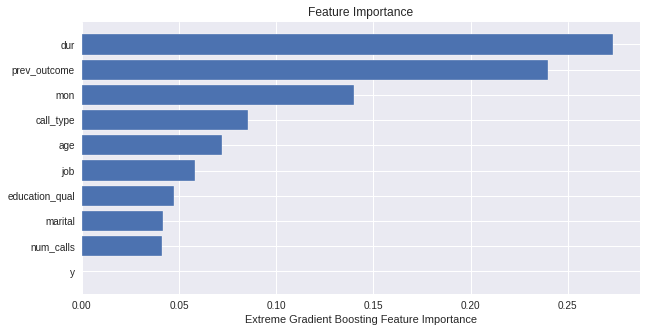

In [286]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

Conclusion

According to the **feature importance** given by Best Machine Learning
Algorithm(**Extreme Gradient Boosting**), the above features in order contribute towards the price.

According to the AUC ROC curve score 0.8192823084612132 0.73048203327199, which means the classifier can detect more numbers of True positives and True negatives than False negatives and False positives.

which means that the machine learning model helps us 1.6 times better than randomly guessing. The model was able to catch 62% of customers that will subscribe to a insurance.
